# Deep reinforcement learning: Bananas

In this notebook we will train and test DRL agents with different optimization algorithms:

- Vanilla DQN
- Double DQN
- Prioritized Experience Replay
- Dueling DQN
- All together (Rainbow)

First, the agents will train against an environment, trying to collect as many bananas as they can in a fixed time. Once an agent trained for 2000 episodes, the train will stop. When all agents are trained successfully, we will plot the results of the training, describing the rewards obtained over episodes.

At last, we will test our agents against the environment 100 episodes. We will see which agent generalize better.

Now let's do this!

We will need to import some libraries to our project:

In [6]:
# import sys
# !{sys.executable} -m pip install torch==1.9.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

from model import QNetwork
from collections import deque
import numpy as np
import torch
from unityagents import UnityEnvironment

# Agents
from dqn_agent import Agent
from double_dqn_agent import DoubleDQNAgent
from per_agent import PERAgent
from dueling_dqn_agent import DuelingDQNAgent
from rainbow_agent import RainbowAgent

Now we will initialize the environment. The attribute "file_name" should point to the environment's executable file.

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


The environment needs to set a brain:

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

We will retrieve some environment information, for example, the possible states and actions

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


Now we will construct the train method. This function will train our agents to try to solve the environment.

In [5]:
def dqn(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    torch.save(agent.qnetwork_local.state_dict(), '{}.pth'.format(agent.name()))
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
#         if np.mean(scores_window) > 13:
#             print('\r\rEnvironment solved in {} episodes!'.format(i_episode))
#             torch.save(agent.qnetwork_local.state_dict(), '{}.pth'.format(agent.name()))
#             break
            
        if i_episode % 100 == 0:
            print('\r\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), '{}.pth'.format(agent.name()))

    return scores




Training execution!

In [6]:
print("Starting training with a vanilla DQN agent: ")
dqn_scores = dqn(Agent(state_size=37, action_size=4, seed=0))
print("Starting training with a Double DQN agent: ")
double_dqn_scores = dqn(DoubleDQNAgent(state_size=37, action_size=4, seed=0))
print("Starting training with a Prioritized Experience Replay agent: ")
per_scores = dqn(PERAgent(state_size=37, action_size=4, seed=0))
print("Starting training with a Dueling DQN agent: ")
dueling_dqn_scores = dqn(DuelingDQNAgent(state_size=37, action_size=4, seed=0))
print("Starting training with all-mixed-strategies agent (Rainbow): ")
rainbow_scores = dqn(RainbowAgent(state_size=37, action_size=4, seed=0))

Starting training with a vanilla DQN agent: 
Episode 100	Average Score: 0.45
Episode 200	Average Score: 3.00
Episode 300	Average Score: 6.04
Episode 400	Average Score: 9.60
Episode 500	Average Score: 12.80
Episode 600	Average Score: 13.69
Episode 700	Average Score: 14.01
Episode 800	Average Score: 13.97
Episode 900	Average Score: 13.95
Episode 1000	Average Score: 13.79
Episode 1100	Average Score: 13.97
Episode 1200	Average Score: 13.96
Episode 1300	Average Score: 13.99
Episode 1400	Average Score: 14.82
Episode 1500	Average Score: 14.61
Episode 1600	Average Score: 14.68
Episode 1700	Average Score: 14.15
Episode 1800	Average Score: 13.69
Episode 1900	Average Score: 13.89
Episode 2000	Average Score: 14.40
Starting training with a Double DQN agent: 
Episode 100	Average Score: 0.23
Episode 200	Average Score: 1.88
Episode 300	Average Score: 6.70
Episode 400	Average Score: 10.97
Episode 500	Average Score: 14.07
Episode 600	Average Score: 14.21
Episode 700	Average Score: 13.71
Episode 800	Aver

Done! Now that our agents are trained, we will want to plot their performance. Some will get a score of 13 faster than others. But beware! Is possible that faster agents don't be the best at generalizing. We will see!

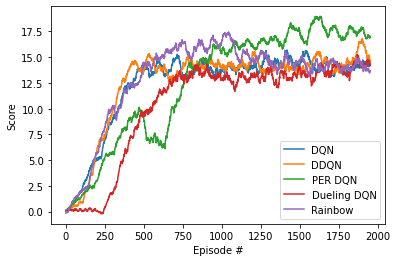

In [7]:
import matplotlib.pyplot as plt

def remove_noise(scores):
    """ 
    This method will flat a noisy plot 
    returns: array of scores less noisy
    """
    batch_size = 50 # The more, the less noisy
    output = []
    for i in range(len(scores)):
        batch = scores[i:i+batch_size]
        output.append(np.mean(batch))
        if i+batch_size >= len(scores):
            break
            
    return output

dqn_scores_ = remove_noise(dqn_scores)
double_dqn_scores_ = remove_noise(double_dqn_scores)
per_scores_ = remove_noise(per_scores)
dueling_dqn_scores_ = remove_noise(dueling_dqn_scores)
rainbow_scores_ = remove_noise(rainbow_scores)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores_)), dqn_scores_, label='DQN')
plt.plot(np.arange(len(double_dqn_scores_)), double_dqn_scores_, label='DDQN')
plt.plot(np.arange(len(per_scores_)), per_scores_, label='PER DQN')
plt.plot(np.arange(len(dueling_dqn_scores_)), dueling_dqn_scores_, label='Dueling DQN')
plt.plot(np.arange(len(rainbow_scores_)), rainbow_scores_, label='Rainbow')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

Now the test will begin! We will watch the agent better at generalizing:

In [7]:
dqn_agent = Agent(state_size=37, action_size=4, seed=0)
double_dqn_agent = DoubleDQNAgent(state_size=37, action_size=4, seed=0)
per_agent = PERAgent(state_size=37, action_size=4, seed=0)
dueling_dqn_agent = DuelingDQNAgent(state_size=37, action_size=4, seed=0)
rainbow_agent = RainbowAgent(state_size=37, action_size=4, seed=0)

agents = [dqn_agent, double_dqn_agent, per_agent, dueling_dqn_agent, rainbow_agent]

dqn_test_scores = []
double_test_dqn_scores = []
per_test_scores = []
dueling_test_dqn_scores = []
rainbow_test_scores = []

scores = [dqn_test_scores, double_test_dqn_scores, per_test_scores, dueling_test_dqn_scores, rainbow_test_scores]

for x in range(len(agents)):
    agent = agents[x]
    print("Starting the inference of the {} algorithm!".format(agent.name()))
    agent.qnetwork_local.load_state_dict(torch.load('{}.pth'.format(agent.name())))
    agent.qnetwork_local.eval()
    score = 0
    episodes = 100                      
    for i in range(episodes): 
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state

        while True:
            action = agent.act(state)                      # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break

        scores[x].append(score/(i+1))
        print("Episode: {}, Score: {}".format(i+1, score/(i+1)))

    print("Score: {}".format(score/episodes))

Starting the inference of the DQN agent algorithm!
Episode: 1, Score: 12.0
Episode: 2, Score: 13.5
Episode: 3, Score: 10.0
Episode: 4, Score: 11.5
Episode: 5, Score: 12.2
Episode: 6, Score: 13.0
Episode: 7, Score: 13.285714285714286
Episode: 8, Score: 13.625
Episode: 9, Score: 12.666666666666666
Episode: 10, Score: 12.6
Episode: 11, Score: 13.090909090909092
Episode: 12, Score: 12.333333333333334
Episode: 13, Score: 11.615384615384615
Episode: 14, Score: 12.285714285714286
Episode: 15, Score: 12.2
Episode: 16, Score: 12.375
Episode: 17, Score: 12.529411764705882
Episode: 18, Score: 12.88888888888889
Episode: 19, Score: 13.105263157894736
Episode: 20, Score: 13.25
Episode: 21, Score: 12.904761904761905
Episode: 22, Score: 13.136363636363637
Episode: 23, Score: 13.130434782608695
Episode: 24, Score: 13.0
Episode: 25, Score: 12.96
Episode: 26, Score: 12.807692307692308
Episode: 27, Score: 12.407407407407407
Episode: 28, Score: 12.714285714285714
Episode: 29, Score: 12.758620689655173
Epis

Episode: 28, Score: 17.357142857142858
Episode: 29, Score: 17.20689655172414
Episode: 30, Score: 17.2
Episode: 31, Score: 17.29032258064516
Episode: 32, Score: 17.1875
Episode: 33, Score: 17.303030303030305
Episode: 34, Score: 17.38235294117647
Episode: 35, Score: 17.428571428571427
Episode: 36, Score: 17.305555555555557
Episode: 37, Score: 17.324324324324323
Episode: 38, Score: 17.394736842105264
Episode: 39, Score: 17.307692307692307
Episode: 40, Score: 17.275
Episode: 41, Score: 17.170731707317074
Episode: 42, Score: 17.214285714285715
Episode: 43, Score: 17.27906976744186
Episode: 44, Score: 17.181818181818183
Episode: 45, Score: 17.244444444444444
Episode: 46, Score: 17.26086956521739
Episode: 47, Score: 17.25531914893617
Episode: 48, Score: 17.208333333333332
Episode: 49, Score: 17.06122448979592
Episode: 50, Score: 17.08
Episode: 51, Score: 17.07843137254902
Episode: 52, Score: 17.096153846153847
Episode: 53, Score: 17.150943396226417
Episode: 54, Score: 17.074074074074073
Episo

Episode: 52, Score: 13.26923076923077
Episode: 53, Score: 13.39622641509434
Episode: 54, Score: 13.481481481481481
Episode: 55, Score: 13.527272727272727
Episode: 56, Score: 13.517857142857142
Episode: 57, Score: 13.526315789473685
Episode: 58, Score: 13.344827586206897
Episode: 59, Score: 13.305084745762711
Episode: 60, Score: 13.4
Episode: 61, Score: 13.311475409836065
Episode: 62, Score: 13.306451612903226
Episode: 63, Score: 13.333333333333334
Episode: 64, Score: 13.390625
Episode: 65, Score: 13.4
Episode: 66, Score: 13.348484848484848
Episode: 67, Score: 13.298507462686567
Episode: 68, Score: 13.294117647058824
Episode: 69, Score: 13.376811594202898
Episode: 70, Score: 13.428571428571429
Episode: 71, Score: 13.352112676056338
Episode: 72, Score: 13.375
Episode: 73, Score: 13.41095890410959
Episode: 74, Score: 13.486486486486486
Episode: 75, Score: 13.493333333333334
Episode: 76, Score: 13.486842105263158
Episode: 77, Score: 13.532467532467532
Episode: 78, Score: 13.525641025641026

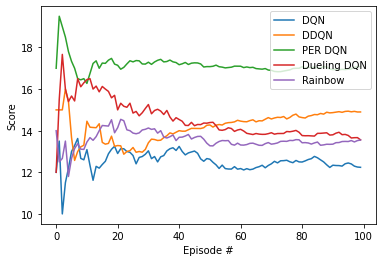

In [11]:
import matplotlib.pyplot as plt

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_test_scores)), dqn_test_scores, label='DQN')
plt.plot(np.arange(len(double_test_dqn_scores)), double_test_dqn_scores, label='DDQN')
plt.plot(np.arange(len(per_test_scores)), per_test_scores, label='PER DQN')
plt.plot(np.arange(len(dueling_test_dqn_scores)), dueling_test_dqn_scores, label='Dueling DQN')
plt.plot(np.arange(len(rainbow_test_scores)), rainbow_test_scores, label='Rainbow')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

Now that we finished, we give the environment a well deserved rest.

In [12]:
env.close()